### Imports

In [3]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.datasets import load_diabetes
import pandas as pd

# diabetes = load_diabetes()
# df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# df1 = diabetes.target

### Loading Diabetes dataset and storing it in a panda dataframe


In [8]:
df = pd.read_csv('diabetes.csv')
df = df.dropna();
df.dropna(inplace=True)
a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in a:
  x = df[i].mean()
  df[i].fillna(x, inplace=True)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [10]:
y = df['Outcome']
X = df[a]

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability
from sklearn.preprocessing import StandardScaler

def decision_tree_model_diabetes(test_ratio, X, y, criterion_string="entropy"):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)
  decision_tree_model = DecisionTreeClassifier(random_state=None, max_depth = 3, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print("Confusion Matrix: ")
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

  # Create a figure and axis for the decision tree plot
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot the decision tree
  tree.plot_tree(decision_tree_model, feature_names=a, class_names=['non-diabetic','diabetic'], filled=True, rounded=True, ax=ax)

  # Add a title
  ax.set_title('Decision Tree Plot')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()

  # Show the decision tree plot
  plt.show()

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

Confusion Matrix: 
[[127  19]
 [ 37  48]]


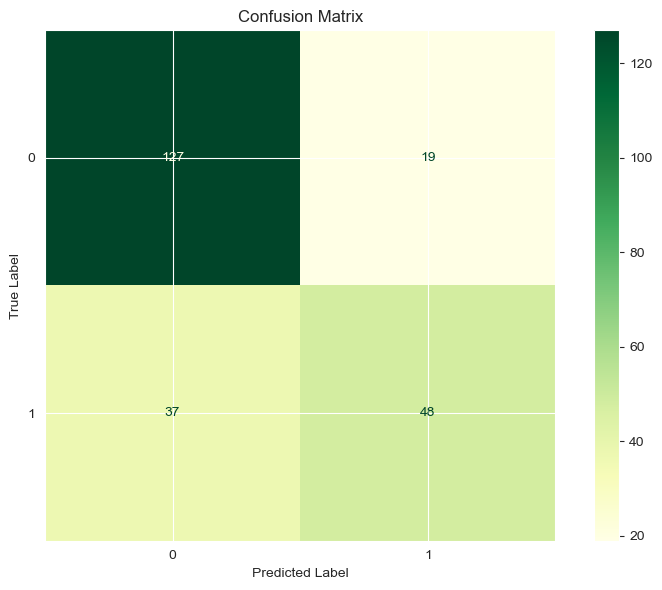

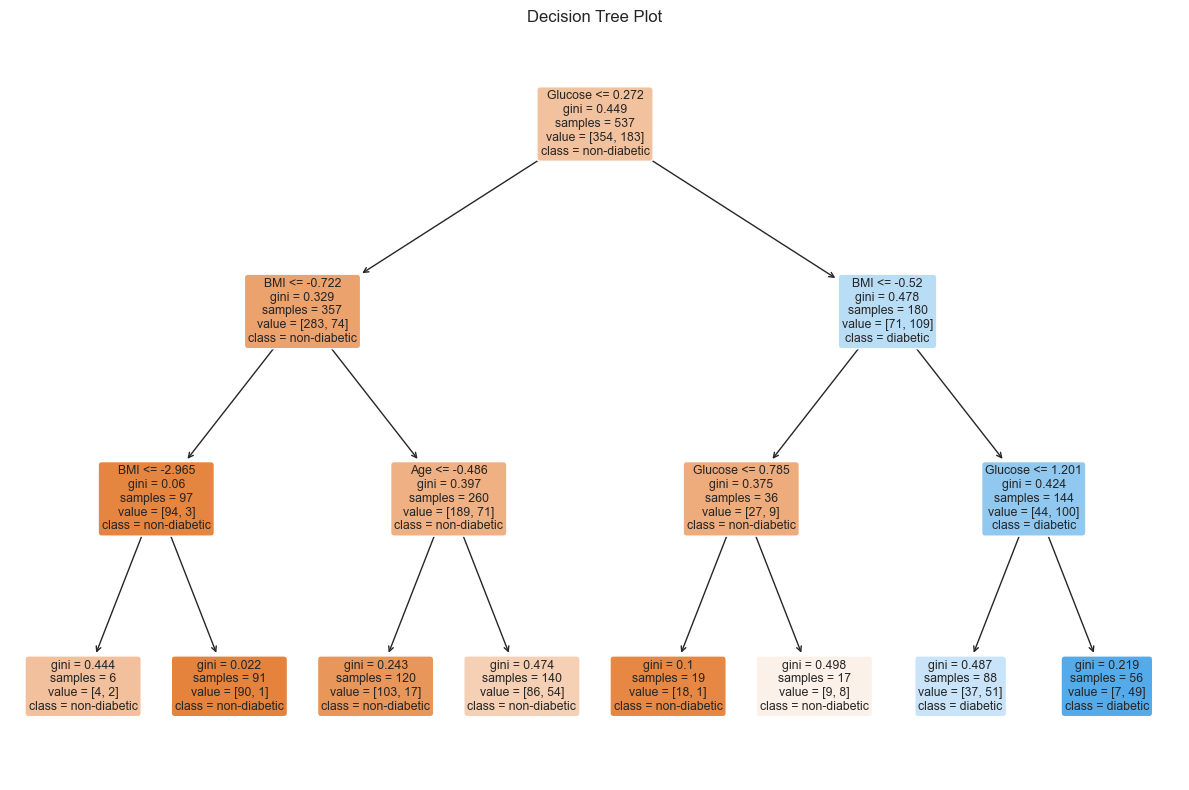

In [19]:
decision_tree_model_diabetes(0.3, X, y, "gini")

### Naive-Bayes Classification

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def multinomialNB_model_diabetes(test_ratio, X, y,alpha=1e-6):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)

  model = MultinomialNB(alpha=alpha)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Multinomial Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def gaussianNB_model_diabetes(test_ratio, X, y, smooth = 1e-9):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = GaussianNB(var_smoothing=smooth)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Gaussian Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def bernoulliNB_model_diabetes(test_ratio, X, y,alpha=1e-6):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  model = BernoulliNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Bernoulli Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

Classification report for Multinomial Naive Bayes model:

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       264
           1       0.42      0.49      0.45       120

    accuracy                           0.63       384
   macro avg       0.59      0.59      0.59       384
weighted avg       0.65      0.63      0.64       384

[[183  81]
 [ 61  59]]


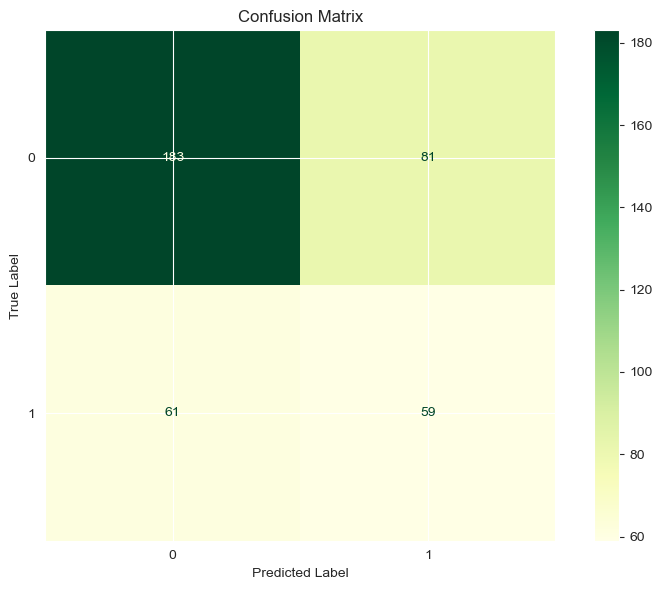

In [15]:
multinomialNB_model_diabetes(0.5,X,y,alpha=1e-6)

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df1 = diabetes.target
print(df)
print(df1)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  